<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/finalProject/FinalProjectTeam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import math
import statsmodels.api as sm
%matplotlib inline
os.getcwd()

'/content'

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.xlsx to ToyotaCorolla.xlsx


In [4]:
corolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name="data")

print(corolla.describe())
print(corolla.info())
print(corolla.shape)
corolla.head()
print(corolla.shape)

                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           CC  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   


# Part I

In [6]:
corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [10]:
#remove 'Id', 'Model', 'Fuel_Type', 'Color',
cols = ['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',  'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
corolla[cols].corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.029990,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002883,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.025893,0.102292


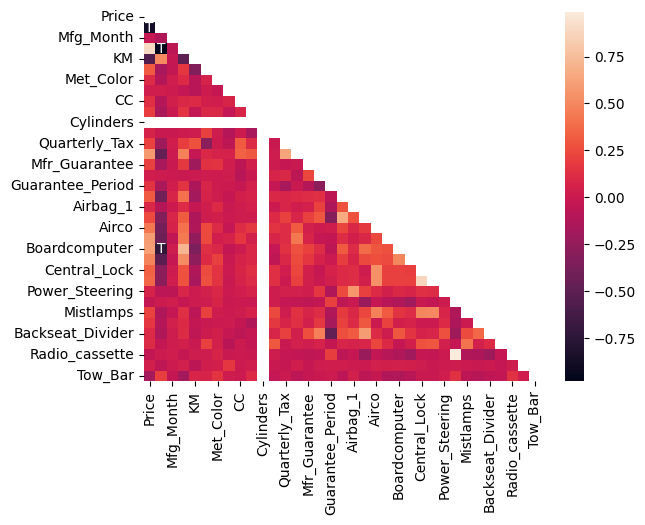

<Figure size 2400x1800 with 0 Axes>

In [43]:
#import matplotlib.pyplot as plt

matrix = corolla[cols].corr().round(2)
mask = np.triu(np.ones_like(matrix.corr()))
annot_labels = np.empty_like(matrix, dtype=str)
annot_mask = matrix > 0.6
annot_mask = matrix < -0.6
annot_labels[annot_mask] = 'T'
sns.heatmap(matrix, annot=annot_labels, mask=mask, fmt='')
plt.figure(figsize=(24, 18))
plt.show()
#print(annot_mask)

In [42]:
annot_mask.sapply(type)

Price                <class 'pandas.core.series.Series'>
Age_08_04            <class 'pandas.core.series.Series'>
Mfg_Month            <class 'pandas.core.series.Series'>
Mfg_Year             <class 'pandas.core.series.Series'>
KM                   <class 'pandas.core.series.Series'>
HP                   <class 'pandas.core.series.Series'>
Met_Color            <class 'pandas.core.series.Series'>
Automatic            <class 'pandas.core.series.Series'>
CC                   <class 'pandas.core.series.Series'>
Doors                <class 'pandas.core.series.Series'>
Cylinders            <class 'pandas.core.series.Series'>
Gears                <class 'pandas.core.series.Series'>
Quarterly_Tax        <class 'pandas.core.series.Series'>
Weight               <class 'pandas.core.series.Series'>
Mfr_Guarantee        <class 'pandas.core.series.Series'>
BOVAG_Guarantee      <class 'pandas.core.series.Series'>
Guarantee_Period     <class 'pandas.core.series.Series'>
ABS                  <class 'pa

In [ ]:
corolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name="data")

print(corolla.describe())
print(corolla.info())
print(corolla.shape)
corolla.head()
print(corolla.shape)

                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           CC  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   


In [ ]:
corolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name="data")

print(corolla.describe())
print(corolla.info())
print(corolla.shape)
corolla.head()
print(corolla.shape)

                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           CC  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   


In [ ]:
# what about CC, Cylinders, Gears, Weight, BOVAG Guarantee, ABS, Airbag_1, Airbag_2, Boardcomputer, Central Lock, Power_Steering, Radio, Mistlamps, Backseat_Divider, Metallic_Rim, Radio_cassette
predictors = ["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax", "Mfr_Guarantee",
"Guarantee_Period", "Airco", "Automatic_airco", "CD_Player", "Powered_Windows",
"Sport_Model", "Tow_Bar"]
outcome = ["Price"]

corrola_data = corolla[predictors + outcome].copy()
corrola_data.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price
0,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0,13500
1,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0,13750
2,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,13950
3,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,14950
4,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0,13750


In [ ]:
# Encode Fuel_Type as one hot encoding
# as there are more than 2 possible values for "Fuel_Type"
corrola_enc = corrola_data.copy() # Copy out for re-run consistancy
corrola_enc = pd.get_dummies(corrola_enc, columns=["Fuel_Type"], dtype = "int")
corrola_enc.head()





,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,13500,0,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,13750,0,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,13950,0,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,14950,0,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,13750,0,1,0


In [ ]:
corrola_enc.isna().sum()

Age_08_04           0
KM                  0
HP                  0
Automatic           0
Doors               0
Quarterly_Tax       0
Mfr_Guarantee       0
Guarantee_Period    0
Airco               0
Automatic_airco     0
CD_Player           0
Powered_Windows     0
Sport_Model         0
Tow_Bar             0
Price               0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [ ]:
def print_percents(ttl, pct):
  print(f"{int(pct*100)}% of {ttl:,} is {pct*ttl:,.2f}")

for pct in [.5,.3,.2]:
  print_percents(len(corrola_enc), pct)

50% of 1,436 is 718.00
30% of 1,436 is 430.80
20% of 1,436 is 287.20


In [ ]:
# Split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(
    corrola_enc.drop('Price', axis=1), corrola_enc['Price'], test_size=0.5, random_state=42)

# Now split the remaining dataset into validation and test datasets.
# 40% of the remaining 50% is 30% of total
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.4, random_state=42)

# shape is (# of rows, # of columns)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(718, 17)
(718,)
(430, 17)
(430,)
(288, 17)
(288,)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.intercept_)
print(lr_model.coef_)

10976.642572498808
[-1.08704629e+02 -1.77211025e-02  3.25122471e+01  5.77899481e+02
  1.94880208e+02  1.54915042e+01  2.77396627e+02  6.81605818e+01
  2.46572488e+02  2.85415537e+03  3.62275419e+02  4.19159345e+02
  3.96351672e+02 -2.56982042e+02 -1.23443422e+03  6.12742781e+02
  6.21691439e+02]


In [ ]:
# Display coefficents as a dataframe
cdf = pd.DataFrame(lr_model.coef_, X_train.columns, columns=['Coefficients']).reset_index()
cdf.columns = ['Feature', 'Coefficient']
cdf

,Feature,Coefficient
0,Age_08_04,-108.704629
1,KM,-0.017721
2,HP,32.512247
3,Automatic,577.899481
4,Doors,194.880208
5,Quarterly_Tax,15.491504
6,Mfr_Guarantee,277.396627
7,Guarantee_Period,68.160582
8,Airco,246.572488
9,Automatic_airco,2854.155367


In [ ]:
y_pred = lr_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Training set score: {lr_model.score(X_train, y_train):.4f}")
print(f"Validation set score: {lr_model.score(X_valid, y_valid):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Training set score: 0.8913
Validation set score: 0.8917
RMSE: 1237.9501
R-squared: 0.8739


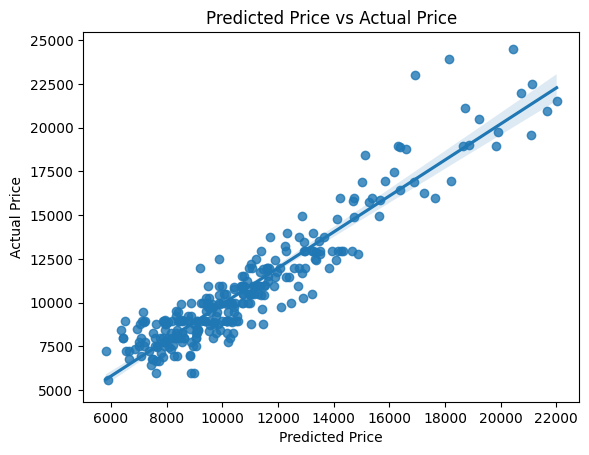

In [ ]:
# Graph y_pred vs y_test using seaborn trend line
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted Price vs Actual Price")
plt.show()

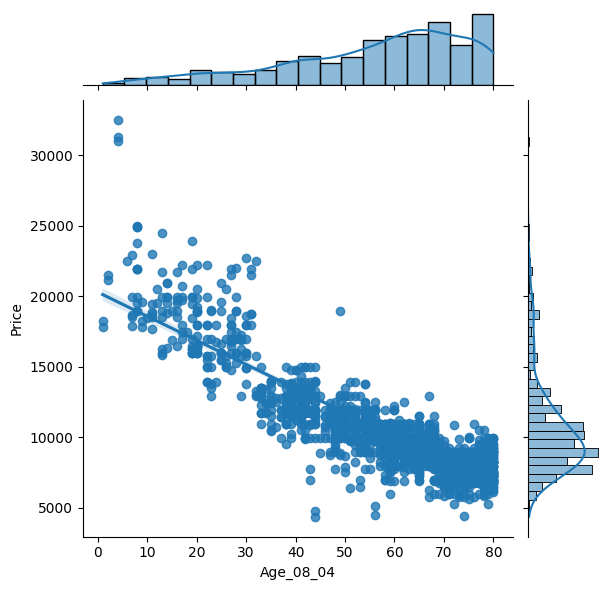

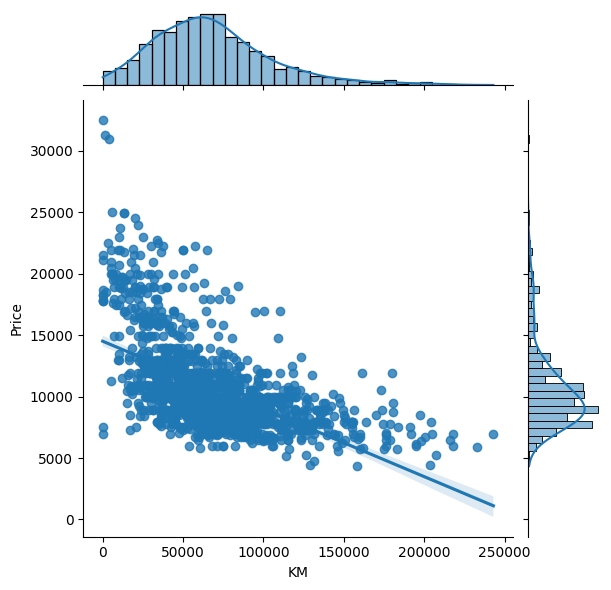

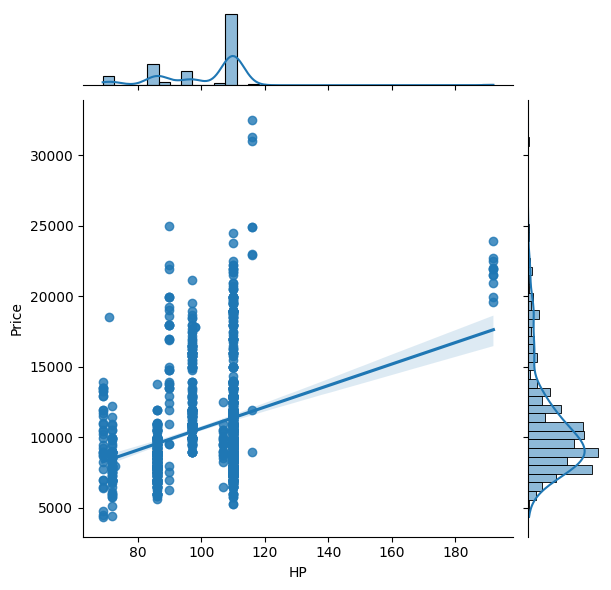

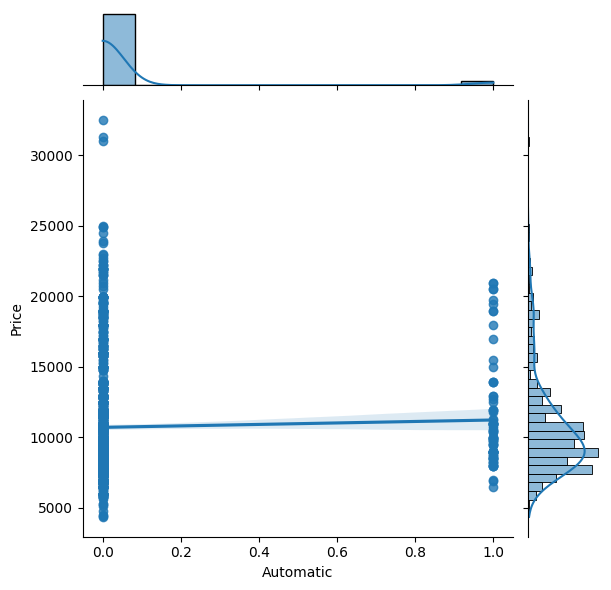

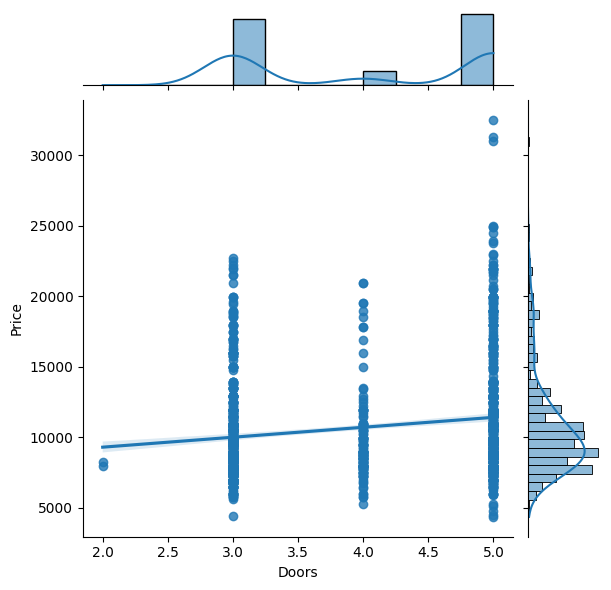

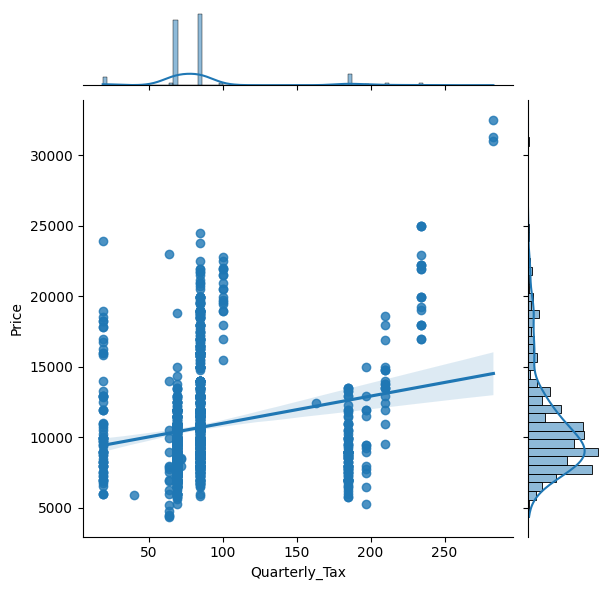

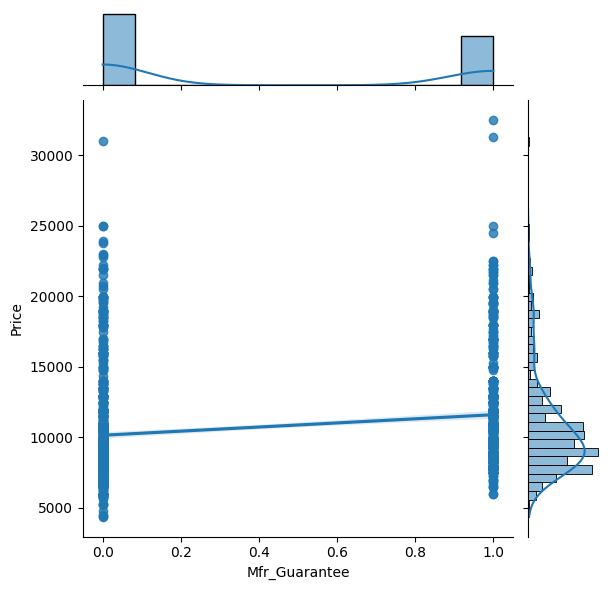

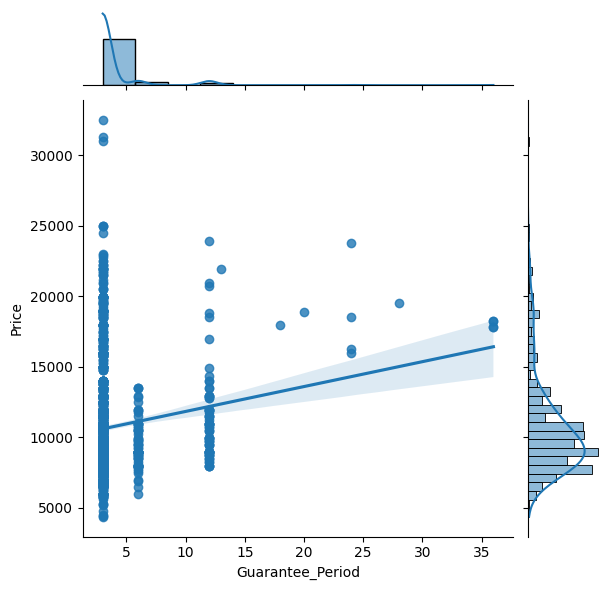

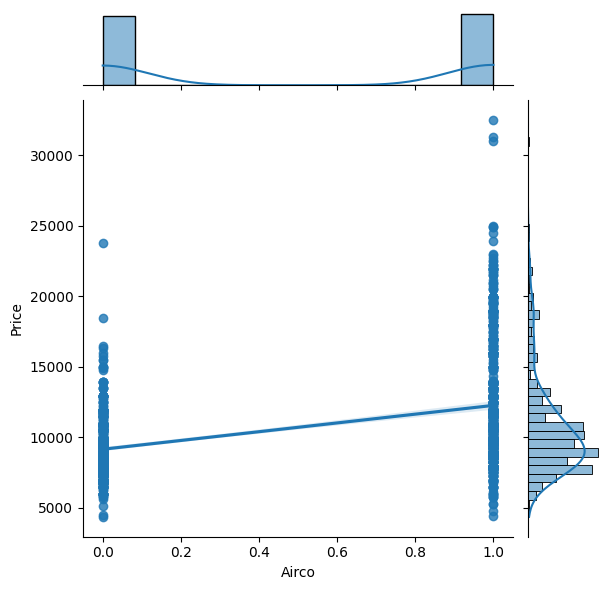

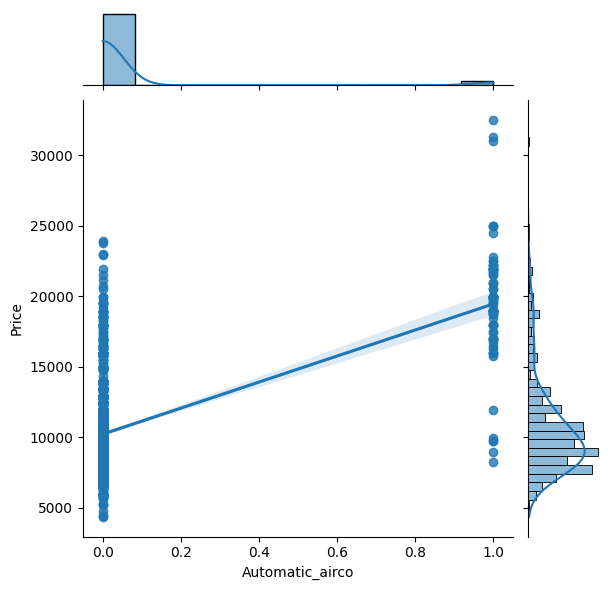

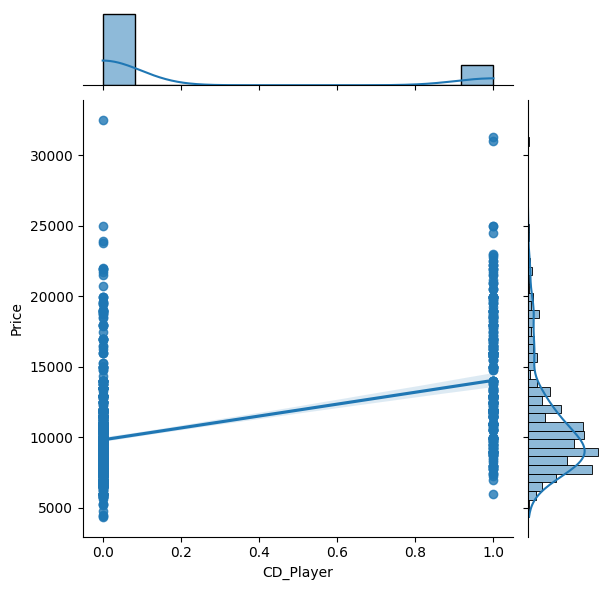

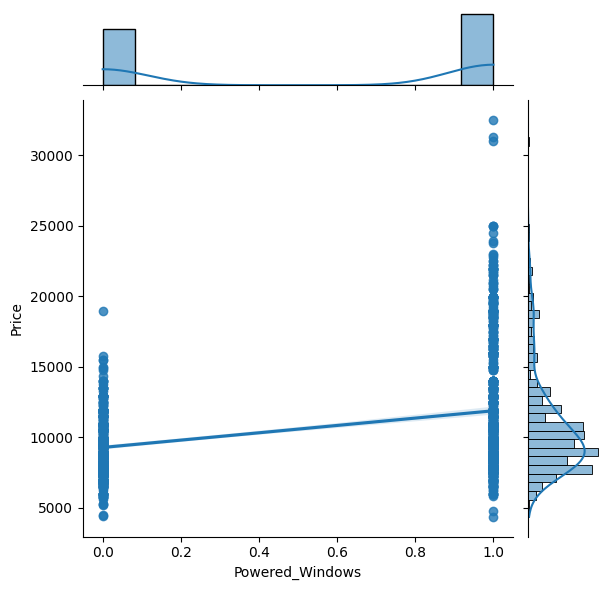

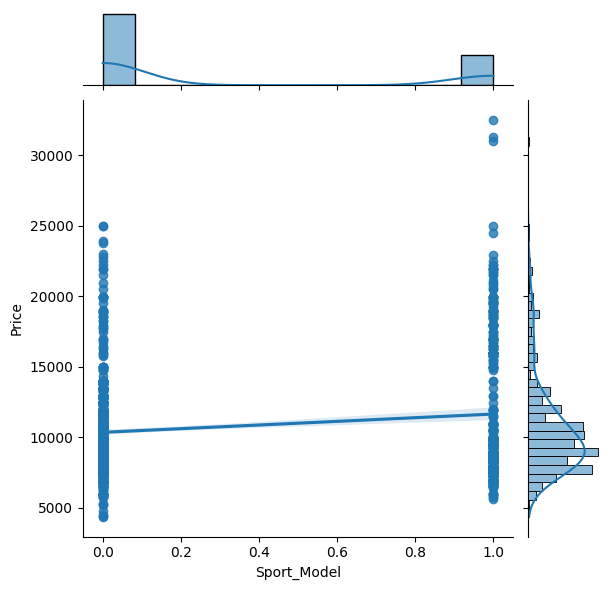

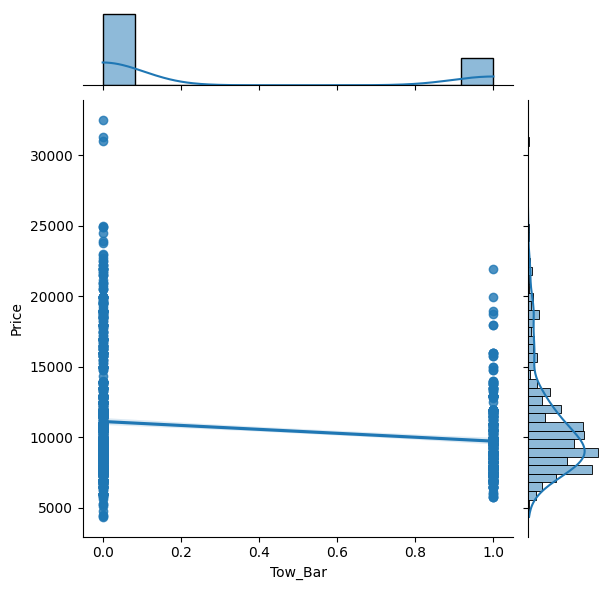

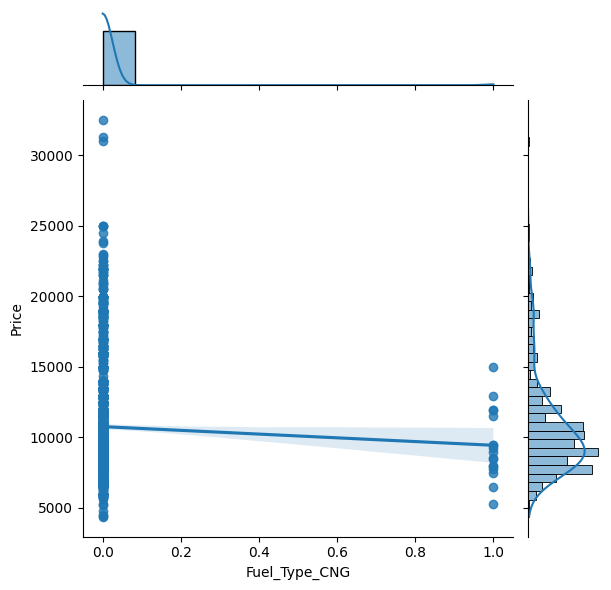

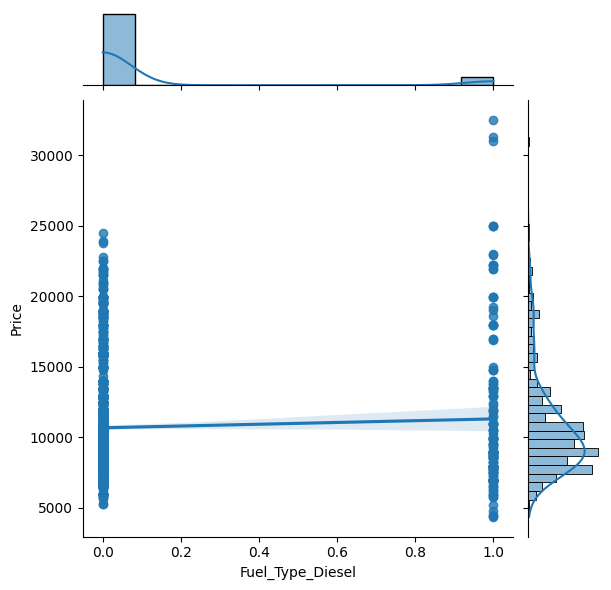

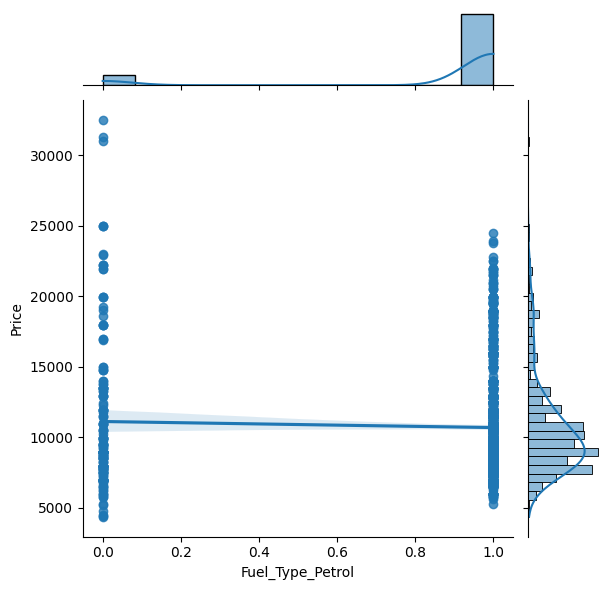

In [ ]:
for col in X_train.columns:
  sns.jointplot(x=col, y="Price", data = corrola_enc,kind="reg")
  plt.show()

In [ ]:
# For Fun, Let's Use sm to get
#  an alternative Ordinary Least Squares (OLS) Linear Regression model summary
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())
print("*"*10)
print(est2.summary2())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     359.3
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:52:47   Log-Likelihood:                -6087.1
No. Observations:                 718   AIC:                         1.221e+04
Df Residuals:                     701   BIC:                         1.229e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8232.4819    417.004  

The three bigest explainatory variables are


1.   Age (Age_08_04)
1.   KM driven (KM)
1.   Horsepower (HP)



#Part II

In [ ]:
# Part II

# Get the data carpentried corolla data from Part I, Move Price column to front
corolla_rt = corrola_enc.copy()
column_to_move = 'Price'
first_column = corolla_rt.pop(column_to_move)
corolla_rt.insert(0, column_to_move, first_column)
corolla_rt.head()

# Split data into training (60%) and validation (40%)
X_train, X_valid, y_train, y_valid = train_test_split(
    corolla_rt.drop('Price', axis=1), corolla_rt['Price'], test_size=0.6, random_state=1)

# Create regressor object
regressor = DecisionTreeRegressor(random_state=1)

# Train the regressor
regressor.fit(X_train, y_train)





DecisionTreeRegressor(random_state=1)

In [ ]:
# Plot tree
plt.figure(figsize=(100, 100))
plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b708b88f130> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Predict on training and validation sets
y_train_pred = regressor.predict(X_train)
y_valid_pred = regressor.predict(X_valid)

# Calculate RMSE for training and validation sets
rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = math.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("RMSE (Training):", rmse_train)
print("RMSE (Validation):", rmse_valid)


RMSE (Training): 0.0
RMSE (Validation): 1425.8751246970046


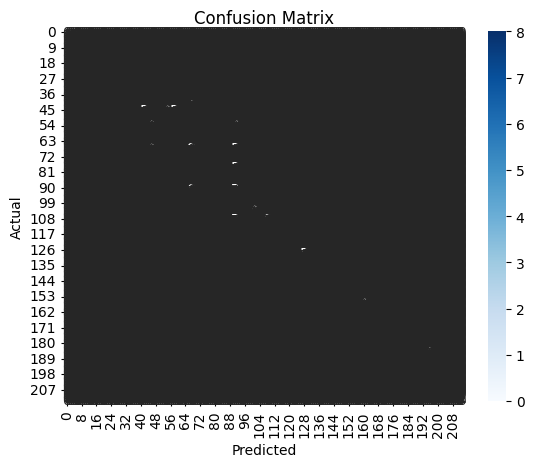

In [ ]:
cm = confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

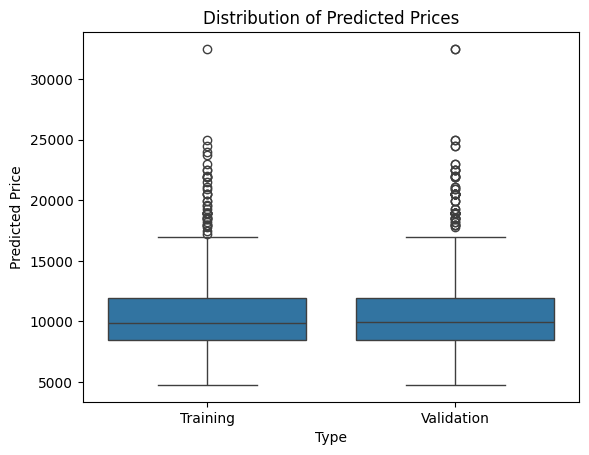

In [ ]:
# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Type': ['Training'] * len(y_train_pred) + ['Validation'] * len(y_valid_pred),
    'Predicted Price': np.concatenate((y_train_pred, y_valid_pred))
})

# Plot boxplot
sns.boxplot(x='Type', y='Predicted Price', data=df_plot)
plt.title('Distribution of Predicted Prices')
plt.show()


In [ ]:
prediction_df = pd.DataFrame({
    'Age_08_04' : [77],
    'KM': [117000],
    'HP': [110],
    'Automatic': [0],
    'Doors': [5],
    'Quarterly_Tax': [100],
    'Mfr_Guarantee': [0],
    'Guarantee_Period':[3],
    'Airco':[1],
    'Automatic_airco':[0],
    'CD_Player':[0],
    'Powered_Windows':[0],
    'Sport_Model':[0],
    'Tow_Bar':[1],
    'Fuel_Type_CNG': [0],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1]
})



msg = "Predicted price of this Toyota Corolla is: "
msg += f"{float(regressor.predict(prediction_df)[0]):,.2f}"
msg += " Euros"

print(msg)

Predicted price of this Toyota Corolla is: 7,250.00 Euros


In [ ]:
# For fun let's predict that Toyota Corolla with the Linear Regression model
# from Part I
msg = "Predicted price of this Toyota Corolla is: "
msg += f"{float(lr_model.predict(prediction_df)[0]):,.2f}"
msg += " Euros"

print(msg)

Predicted price of this Toyota Corolla is: 7,448.68 Euros
